In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
%matplotlib inline

# Равномерное распределение

In [13]:
a, b = 2, 3
x_uniform = np.random.uniform(a, b, 1000)

In [14]:
print("Среднее значение : ", np.mean(x_uniform))

Среднее значение :  2.497726268175816


In [15]:
print("Дисперсия : ", np.var(x_uniform))

Дисперсия :  0.08245671865219867


In [16]:
print("Коэффициент асимметрии : ", skew(x_uniform)) 

Коэффициент асимметрии :  -0.03405365356163527


In [17]:
print("Коэффициент эксцесса : ", kurtosis(x_uniform)) 

Коэффициент эксцесса :  -1.1847150292086406


(array([107.,  99.,  91.,  97.,  92., 111., 110., 100., 101.,  92.]),
 array([2.00032829, 2.10013616, 2.19994403, 2.2997519 , 2.39955977,
        2.49936764, 2.59917551, 2.69898338, 2.79879125, 2.89859912,
        2.99840699]),
 <BarContainer object of 10 artists>)

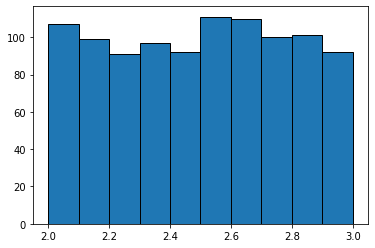

In [18]:
plt.hist(x_uniform, 10, edgecolor='k')

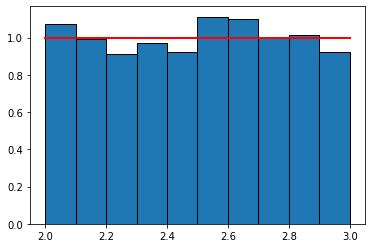

In [19]:
count, bins, ignored = plt.hist(x_uniform, 10, edgecolor='k', density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

## Моделирование равномерно распределенной случайной величины c использованием линейного конгруэнтного метода

#### Необходимо задать следующие параметры:
* $m$, $m>0$ - модуль;
* $a$, $0\leq a<m$ - множитель;
* $c$, $0\leq c<m$ - приращение;
* $X_0$, $0\leq X_0<m$ - начальное значение последовательности.

#### Последовательность псевдослучайных чисел:
$$X_{n+1} = (aX_n + c)\ mod \ m$$ 
$n \geq 0$

**Значение $m$ следует выбирать достаточно большим,поскольку период последовательности
не превышает $m$.**

#### Установите следующие значения параметров:
* $m = 2^{31}-1$;
* $a = 16807$;
* $c=1$;
* $seed = 12345$;
* начальное значение $X_0 = (seed \cdot a + 1) \ mod \ m$ (полученное значение затем разделить на $m$);
* остальные значения последовательности $X_{n+1}$ также разделить на $m$ (таким образом, значения последовательности будут находится в диапазоне (0,1]);
* привести диапазон сгенерированных значений в интервал $(a,b)$ в соответствии со своим вариантом.

In [20]:
m=(2**31)-1 
a = 16807 
c = 1 
seed = 12345 
x0=np.mod((a*seed+1), m, dtype='int64') 
x=np.mod((a*x0+c), m, dtype='int64')
print("Моделирование равномерно распределенной случайной величины c использованием линейного конгруэнтного метода: ", x)

Моделирование равномерно распределенной случайной величины c использованием линейного конгруэнтного метода:  1791006632


# Нормальное распределение

In [22]:
mu, sigma = 1, 2
x_n = np.random.normal(mu, sigma, 10000)

In [24]:
print("Среднее значение : ", np.mean(x_n))
print("Дисперсия : ", np.var(x_n))
print("Коэффициент асимметрии : ", skew(x_n))
print("Коэффициент эксцесса : ", kurtosis(x_n))

Среднее значение :  0.9699298304084343
Дисперсия :  4.034480122070493
Коэффициент асимметрии :  -0.031441670887462705
Коэффициент эксцесса :  0.0012956338220631025


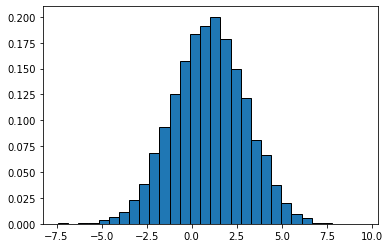

In [25]:
count, bins, ignored = plt.hist(x_n, 30, edgecolor='k', density = True)

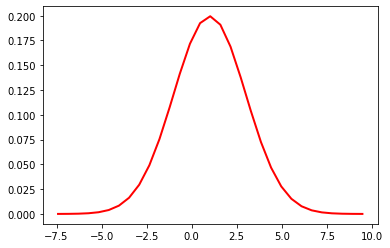

In [26]:
plt.plot(bins, 1/(sigma * np.sqrt(2*np.pi)) * np.exp(- (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

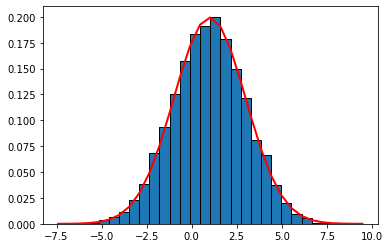

In [27]:
count, bins, ignored = plt.hist(x_n, 30, edgecolor='k', density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2*np.pi)) * np.exp(- (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

## Моделирование нормального распределения с использованием преобразования Бокса-Мюллера

* Получить две случайные величины $U_1$ и $U_2$, равномерно распределённые на интервале $(0 , 1]$.
* Вычислить $z_0$ и $z_1$:
$$z_0 = \sqrt {-2\ln U_1}cos(2\pi U_2)$$     
$$z_1 = \sqrt {-2\ln U_1}sin(2\pi U_2)$$
* Для получения заданного мат. ожидания и дисперсии:
$$z = z_0\sigma + \mu$$

In [29]:
u1 = np.random.random()
u2 = np.random.random()
z0 = ((-2*np.log(u1))**(1/2)) * np.cos(2*np.pi*u2)
z1 = ((-2*np.log(u1))**(1/2)) * np.sin(2*np.pi*u2)
z = z0*np.mean(x_n) + np.var(x_n)
print(z)

3.008094401312135


# Распределение Рэлея

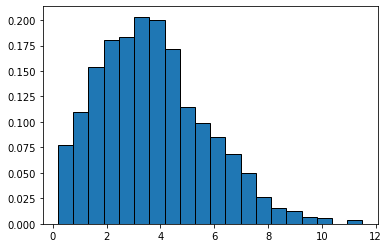

In [33]:
x_r = np.random.rayleigh(3, 1000)
count, bins, ignored = plt.hist(x_r, 20, edgecolor='k', density=True)

## Моделирование распределения Рэлея

* Получить две случайные нормально распределенные величины $x$ и $y$ с нулевым математическим ожиданием и одинаковыми дисперсиями ($\sigma$ в соответствии со своим номером варианта).
* Случайная величина с законом распределения Рэлея рассчитывается как: 
$$R = \sqrt{x^2 + y^2}$$

Среднее значение :  2.503467478780999
Дисперсия :  1.741568436562383
Коэффициент асимметрии :  0.5812980475012156
Коэффициент эксцесса :  0.10664953371081287


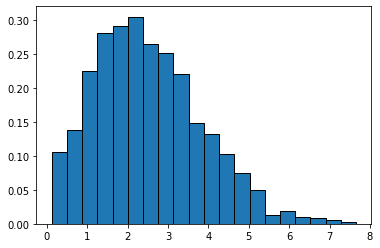

In [38]:
x = np.random.normal(0, 2, 1000)
y = np.random.normal(0, 2, 1000)
r = (x**2 + y**2)**(1/2)
print("Среднее значение : ", np.mean(r))
print("Дисперсия : ", np.var(r))
print("Коэффициент асимметрии : ", skew(r))
print("Коэффициент эксцесса : ", kurtosis(r))
count, bins, ignored = plt.hist(r, 20, edgecolor='k', density=True)


# Распределение Пуассона

Среднее значение :  1.948
Дисперсия :  1.8752960000000003
Коэффициент асимметрии :  0.8460428932181127
Коэффициент эксцесса :  1.4073512365866367


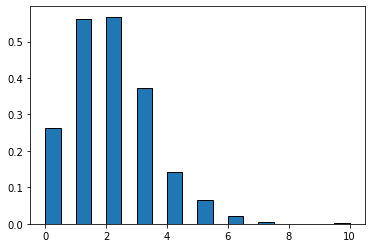

In [40]:
x_p = np.random.poisson(2, 1000)
count, bins, ignored = plt.hist(x_p, 20, edgecolor='k', density=True)
print("Среднее значение : ", np.mean(x_p))
print("Дисперсия : ", np.var(x_p))
print("Коэффициент асимметрии : ", skew(x_p))
print("Коэффициент эксцесса : ", kurtosis(x_p))

# Задание

1. Для каждого распределения с варьируемым размером выборки рассчитать статистические моменты, а именно выборочное среднее, выборочную дисперсию и выборочные коэффициенты асимметрии и эксцесса.
2. Построить гистограмму для полученной выборки и совместить её с графиком теоретической плотности распределения вероятностей.
3. Выполнить моделирование непрерывного равномерного распределения с помощью линейного конгруэнтного метода.
4. Выполнить моделирование нормального распределения с помощью преобразования Бокса-Мюллера.
5. Выполнить моделирование распределения Рэлея.


# Темы для подготовки к защите практического задания №3

1. Случайные величины и процессы. Детерминированные и случайные процессы. Непрерывные и дискретные случайные величины.
2.	Функция распределения случайной величины. Свойства функций распределения. Плотность распределения вероятности и её свойства.
3.	Нормальное (гауссово) распределение. Распределение Рэлея. Равномерное распределение. Распределение Пуассона.
4.	Линейный конгруэнтный метод моделирования случайных величин. Моделирование нормального распределения (центральная предельная теорема, преобразование Бокса-Мюллера). Моделирование распределения Рэлея.
5.	Числовые характеристики случайных величин. Моменты случайной величины. Математическое ожидание. Свойства математического ожидания. Центральные моменты случайной величины. Дисперсия случайной величины и её свойства. Коэффициент асимметрии. Коэффициент эксцесса.